# Identifying Class Imbalance

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dask
import dask.bag
import dask.diagnostics
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import glob
from random import sample

In [2]:
positive_dir='data/positive'
negative_dir='data/negative'
anchor_dir='data/anchor'

In [3]:
number_classes = {'Class_positive': len(os.listdir(positive_dir)),
'Class_negative': len(os.listdir(negative_dir)),
'Class_anchor': len(os.listdir(anchor_dir))}

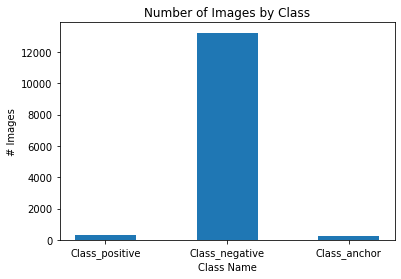

In [4]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

# Plotting image size

In [5]:
directories = {'Class_positive': positive_dir + '/',
'Class_negative': negative_dir + '/',
'Class_anchor': anchor_dir + '/'
}

def get_dims(file):
  '''Returns dimenstions for an RBG image'''
  if file[-3:] =='jpg':
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

[########################################] | 100% Completed |  1.2s
[########################################] | 100% Completed |  7.4s
[########################################] | 100% Completed |  0.9s


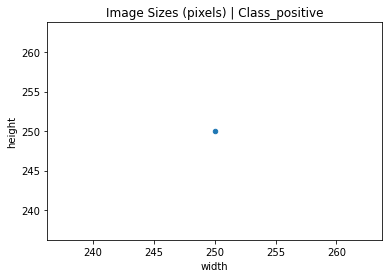

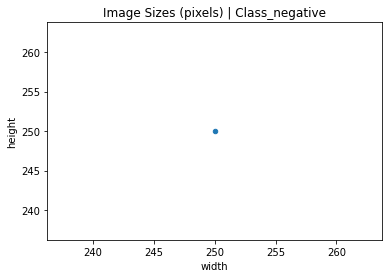

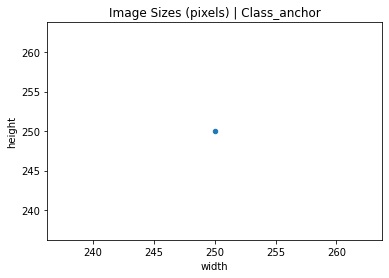

In [6]:
for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = dask.bag.from_sequence(filelist).map(get_dims)
  with dask.diagnostics.ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

# Viewing a sample of Images

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


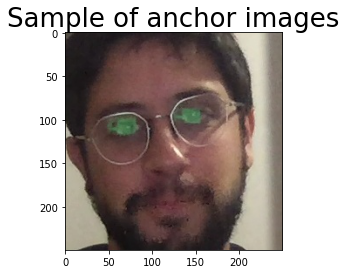

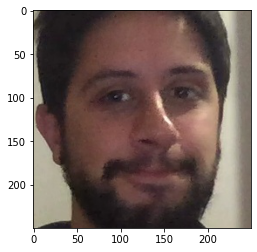

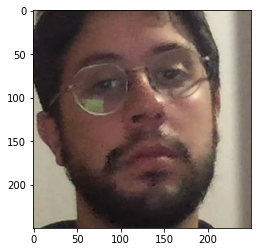

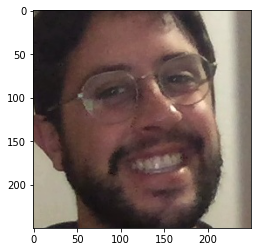

In [8]:
from random import sample
imdir = directories['Class_anchor']

files = []
[files.extend(glob.glob(imdir + '*.jpg' )) ]

rand = sample(range(len(files)),4)

plt.title('Sample of anchor images',fontsize=26)

for i in rand:
  img = mpimg.imread(files[i])
  imgplot = plt.imshow(img)
  plt.show()

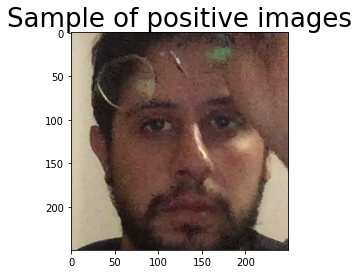

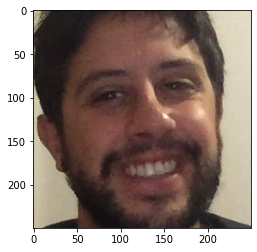

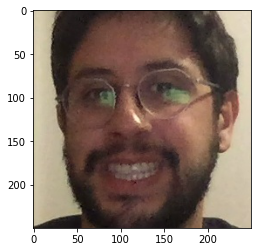

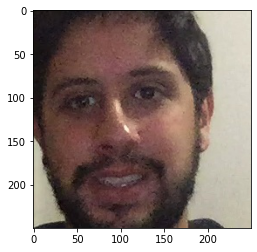

In [9]:
from random import sample
imdir = directories['Class_positive']

files = []
[files.extend(glob.glob(imdir + '*.jpg' )) ]

rand = sample(range(len(files)),4)

plt.title('Sample of positive images',fontsize=26)

for i in rand:
  img = mpimg.imread(files[i])
  imgplot = plt.imshow(img)
  plt.show()


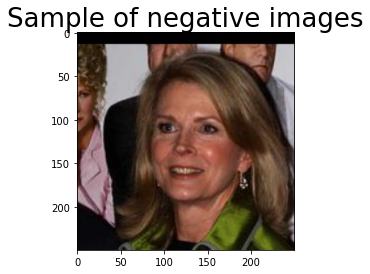

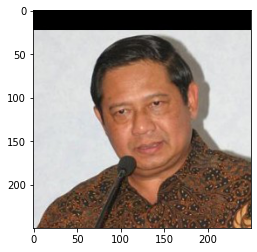

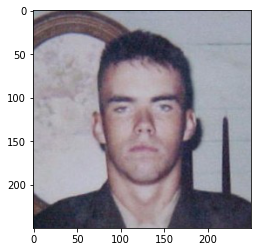

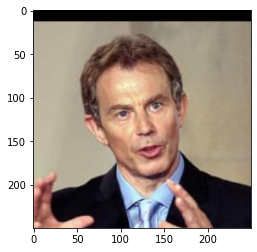

In [13]:
from random import sample
imdir = directories['Class_negative']

files = []
[files.extend(glob.glob(imdir + '*.jpg' )) ]

rand = sample(range(len(files)),4)

plt.title('Sample of negative images',fontsize=26)

for i in rand:
  img = mpimg.imread(files[i])
  imgplot = plt.imshow(img)
  plt.show()
